# Multi-dimensional KDE

In [1]:
%pylab inline
import statsmodels.api as sm
from statsmodels.kernel_methods import fast_linbin
import statsmodels.sandbox.distributions.mv_normal as mvd

Populating the interactive namespace from numpy and matplotlib


## 2D Gaussian mixture model

In [2]:
def rotation(theta):
    return matrix([[cos(theta), -sin(theta)],[sin(theta), cos(theta)]])
r1 = rotation(-1.5)
r2 = rotation(1)
C1 = r1.T * diag([.1,3]) * r1
C2 = r2.T * diag([.1,3]) * r2
d1 = mvd.MVNormal([1, 1.5], C1)
d2 = mvd.MVNormal([0, -1.5], C2)
def dist(x):
    return (d1.pdf(x) + d2.pdf(x))/2
obs = vstack([d1.rvs(3000), d2.rvs(3000)])
bounds = [[-6, 9], [-6, 3]]
mesh, bins = fast_linbin.fast_linbin_nd(obs, bounds, [512, 256])

Text(0.5, 1.0, 'Real PDF')

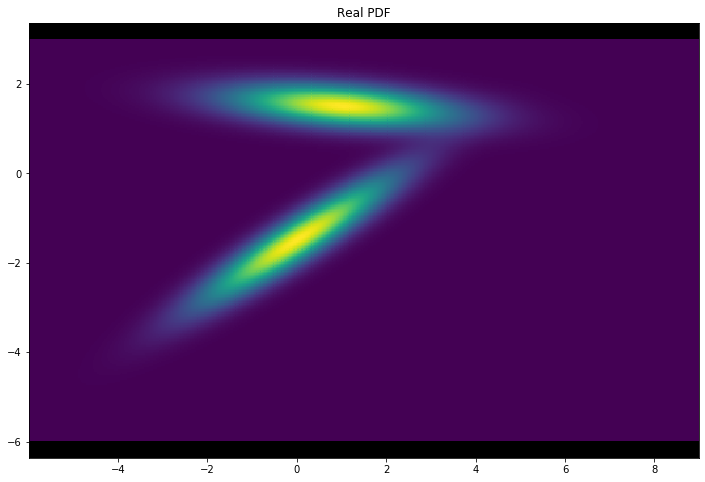

In [6]:
fig = figure(figsize=(12,8))
X, Y = mesh.full('C')
pcolormesh(X, Y, dist(mesh.linear()).reshape(mesh.shape))
gca().set_facecolor('black')
axis('equal')
title('Real PDF')

## Scotts bandwidth estimation

In [7]:
k = sm.kernel_methods.KDE(obs, method=sm.kernel_methods.kde_methods.Cyclic)
k.bandwidth = sm.kernel_methods.bandwidths.scotts_full
est = k.fit()
xs, ys = est.grid(512)
est.bandwidth

array([[0.3793792 , 0.09236338],
       [0.09236338, 0.38082616]])

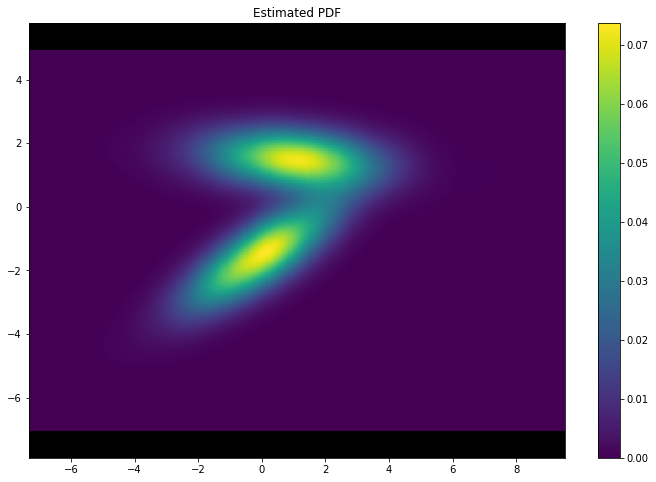

In [9]:
fig = figure(figsize=(12,8))
X, Y = xs.full('C')
pcolormesh(X, Y, ys)
gca().set_facecolor('black')
axis('equal')
title('Estimated PDF')
colorbar()

We can see the bandwidth is clearly over-estimated. Next, we will be using cross-validation.

## Log-likelihood cross-validation

In [10]:
k1 = k.copy()
k1.bandwidth = sm.kernel_methods.bandwidths.CrossValidation(use_grid=True, grid_size=256, folding=5, initial_method=est.bandwidth)
est1 = k1.fit()

In [11]:
xs, ys = est1.grid(256)
est1.bandwidth

array([[0.08704478, 0.12385321],
       [0.12385321, 0.00951416]])

Text(0.5, 1.0, 'Real PDF')

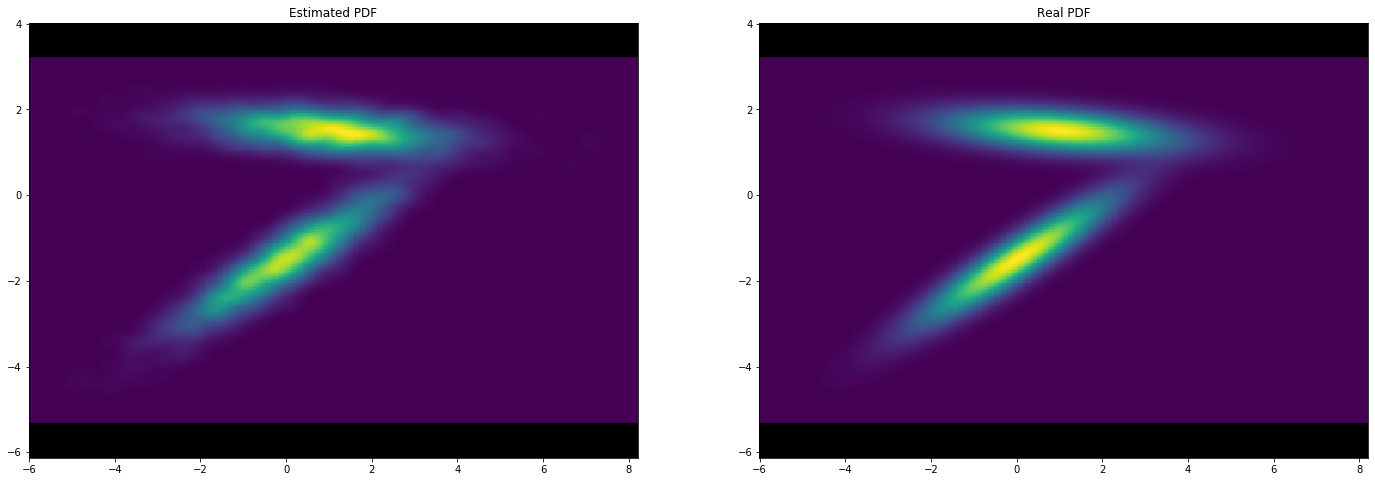

In [12]:
fig = figure(figsize=(24, 8))
ax = fig.add_subplot(1,2,1)
X, Y = xs.full('C')
ax.pcolormesh(X, Y, ys)
ax.set_facecolor('black')
axis('equal')
ax.set_title('Estimated PDF')

ax = fig.add_subplot(1,2,2)
X, Y = xs.full('C')
ax.pcolormesh(X, Y, dist(xs.linear()).reshape(xs.shape))
ax.set_facecolor('black')
axis('equal')
ax.set_title('Real PDF')